In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura e tratamento dos dados

In [2]:
df_pagamento = pd.read_csv('olist_order_payments_dataset.csv')
df_pedidos = pd.read_csv('olist_orders_dataset.csv')
df_cliente = pd.read_csv('olist_customers_dataset.csv')
df_item = pd.read_csv('olist_order_items_dataset.csv')
df_vendedor = pd.read_csv('olist_sellers_dataset.csv')


In [8]:
#visualizando df
df_pagamento

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [5]:
df_pagamento['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [6]:
#retirando o tipo de pagamento indefinido.
df_pagamento = df_pagamento.drop(df_pagamento[df_pagamento['payment_type'] == 'not_defined'].index)
df_pagamento['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

In [7]:
#verificando as informações da tabela
df_pagamento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103883 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103883 non-null  object 
 1   payment_sequential    103883 non-null  int64  
 2   payment_type          103883 non-null  object 
 3   payment_installments  103883 non-null  int64  
 4   payment_value         103883 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [9]:
#visualizando df
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
#verificando se há colunas com nulos
df_pedidos.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
#excluindo colunas e linhas que não serão utilizadas na análise
df_pedidos = df_pedidos.loc[df_pedidos['order_status'] == 'delivered']
pedido_drop = ['order_approved_at', 'order_delivered_carrier_date', ]
df_pedidos = df_pedidos.drop(pedido_drop, axis=1).reset_index(drop=True)

In [13]:
#convertendo as colunas para tipo data 
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])
df_pedidos['order_estimated_delivery_date'] = pd.to_datetime(df_pedidos['order_estimated_delivery_date'])

In [14]:
#verificando as informações da tabela
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96478 entries, 0 to 96477
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_delivered_customer_date  96470 non-null  datetime64[ns]
 5   order_estimated_delivery_date  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.4+ MB


In [15]:
df_cliente

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [16]:
#excluindo coluna 
df_cliente = df_cliente.drop(['customer_unique_id', 'customer_zip_code_prefix'], axis=1).reset_index(drop=True)

In [20]:
#verificando as informações da tabela
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99441 non-null  object
 1   customer_city   99441 non-null  object
 2   customer_state  99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [23]:
df_item.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [24]:
#excluindo coluna
df_item = df_item.drop(['shipping_limit_date', 'product_id','order_item_id'], axis=1).reset_index(drop=True)

In [26]:
#verificando as informações da tabela
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   seller_id      112650 non-null  object 
 2   price          112650 non-null  float64
 3   freight_value  112650 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.4+ MB


In [27]:
df_vendedor.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [28]:
#excluindo coluna
df_vendedor = df_vendedor.drop(['seller_zip_code_prefix'], axis=1).reset_index(drop=True)

In [29]:
#verificando as informações da tabela
df_vendedor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_city   3095 non-null   object
 2   seller_state  3095 non-null   object
dtypes: object(3)
memory usage: 72.7+ KB


Conectando as tabelas através das chaves estrangeiras e criando uma base para análise

In [30]:
df_analise = pd.merge(df_pedidos, df_pagamento, on=['order_id'], how='inner')
df_analise

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...
100751,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08
100752,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00
100753,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01
100754,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16


In [31]:
df_analise = pd.merge(df_analise, df_item, on=['order_id'], how='inner')
df_analise

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115030,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00,1f9ab4708f3056ede07124aad39a2554,174.90,20.10
115031,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01,d50d79cb34e38265a8649c383dcffd48,205.99,65.02
115032,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,a1043bafd471dff536d0c462352beb48,179.99,40.59
115033,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,a1043bafd471dff536d0c462352beb48,179.99,40.59


In [32]:
df_analise = pd.merge(df_analise, df_vendedor, on=['seller_id'], how='inner')
df_analise

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,seller_id,price,freight_value,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115030,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00,1f9ab4708f3056ede07124aad39a2554,174.90,20.10,tupa,SP
115031,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01,d50d79cb34e38265a8649c383dcffd48,205.99,65.02,sao paulo,SP
115032,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,a1043bafd471dff536d0c462352beb48,179.99,40.59,ilicinea,MG
115033,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,a1043bafd471dff536d0c462352beb48,179.99,40.59,ilicinea,MG


In [33]:
df_analise = pd.merge(df_analise, df_cliente, on=['customer_id'], how='inner')
df_analise

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,seller_id,price,freight_value,seller_city,seller_state,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,maua,SP,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,maua,SP,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,maua,SP,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,belo horizonte,SP,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,guariba,SP,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115030,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00,1f9ab4708f3056ede07124aad39a2554,174.90,20.10,tupa,SP,praia grande,SP
115031,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01,d50d79cb34e38265a8649c383dcffd48,205.99,65.02,sao paulo,SP,nova vicosa,BA
115032,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,a1043bafd471dff536d0c462352beb48,179.99,40.59,ilicinea,MG,japuiba,RJ
115033,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,a1043bafd471dff536d0c462352beb48,179.99,40.59,ilicinea,MG,japuiba,RJ


In [34]:
#convertendo a base para csv
df_analise.to_csv('base_ana_dias.csv', index=False)

In [40]:
df_analise.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,seller_id,price,freight_value,seller_city,seller_state,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,maua,SP,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,maua,SP,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,maua,SP,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,belo horizonte,SP,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,guariba,SP,vianopolis,GO


In [35]:
#verificando as colunas da nova base
df_analise.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_id', 'price', 'freight_value', 'seller_city',
       'seller_state', 'customer_city', 'customer_state'],
      dtype='object')

## ANALISAND OS DADOS

1- Qual método de pagamento é mais utilizado na plataforma?

In [36]:
df_analise.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,seller_id,price,freight_value,seller_city,seller_state,customer_city,customer_state
count,115035,115035,115035,115035,115027,115035,115035.000000,115035,115035.000000,115035.000000,115035,115035.000000,115035.00000,115035,115035,115035,115035
unique,96477,96477,1,NaN,NaN,NaN,NaN,4,NaN,NaN,2970,NaN,NaN,595,22,4085,27
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,NaN,credit_card,NaN,NaN,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,sao paulo,SP,sao paulo,SP
freq,63,63,115035,NaN,NaN,NaN,NaN,84896,NaN,NaN,2094,NaN,NaN,28518,82061,18163,48522
mean,NaN,NaN,NaN,2017-12-31 19:52:18.170826240,2018-01-13 07:18:21.263450880,2018-01-24 15:45:52.786543616,1.090685,NaN,2.936706,171.914291,NaN,120.083702,19.99557,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2016-10-03 09:44:50,2016-10-11 13:46:32,2016-10-27 00:00:00,1.000000,NaN,0.000000,0.000000,NaN,0.850000,0.00000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2017-09-13 08:00:06.500000,2017-09-25 14:25:03.500000,2017-10-04 00:00:00,1.000000,NaN,1.000000,60.850000,NaN,39.900000,13.08000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2018-01-19 12:30:36,2018-02-01 19:18:43,2018-02-15 00:00:00,1.000000,NaN,2.000000,108.190000,NaN,74.900000,16.28000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2018-05-04 16:53:16,2018-05-15 16:52:57,2018-05-28 00:00:00,1.000000,NaN,4.000000,188.940000,NaN,133.000000,21.18000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-10-17 13:22:46,2018-10-25 00:00:00,26.000000,NaN,24.000000,13664.080000,NaN,6735.000000,409.68000,NaN,NaN,NaN,NaN


Utilizando o 'describe' já conseguimos identificar que o cartão de crédito é o método de pagamento mais utilizado, mas vamos analizar todos os métodos de pagamento para termos uma melhor visualização e o valor total de cada um.

In [69]:
#agrupando os pagamento de cada método, somando os respectivos valores e ordenando em ordem crescente
df_metodo_pag = df_analise.groupby('payment_type')['payment_value'].sum().reset_index().sort_values(by='payment_value', ascending=False)
df_metodo_pag

,payment_type,payment_value
1,credit_card,15190241.73
0,boleto,3943080.78
3,voucher,396110.42
2,debit_card,246727.51


In [52]:
# Calculando a porcentagem de cada método de pagamento
total_pagamento = df_metodo_pag['payment_value'].sum()
df_metodo_pag['payment_percentage'] = (df_metodo_pag['payment_value'] / total_pagamento) * 100
df_metodo_pag[['payment_type', 'payment_percentage']]

,payment_type,payment_percentage
1,credit_card,76.810874
0,boleto,19.938556
3,voucher,2.002969
2,debit_card,1.247601


C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_22564\2742917115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_metodo_pag, x='payment_type', y='payment_value', palette='viridis')


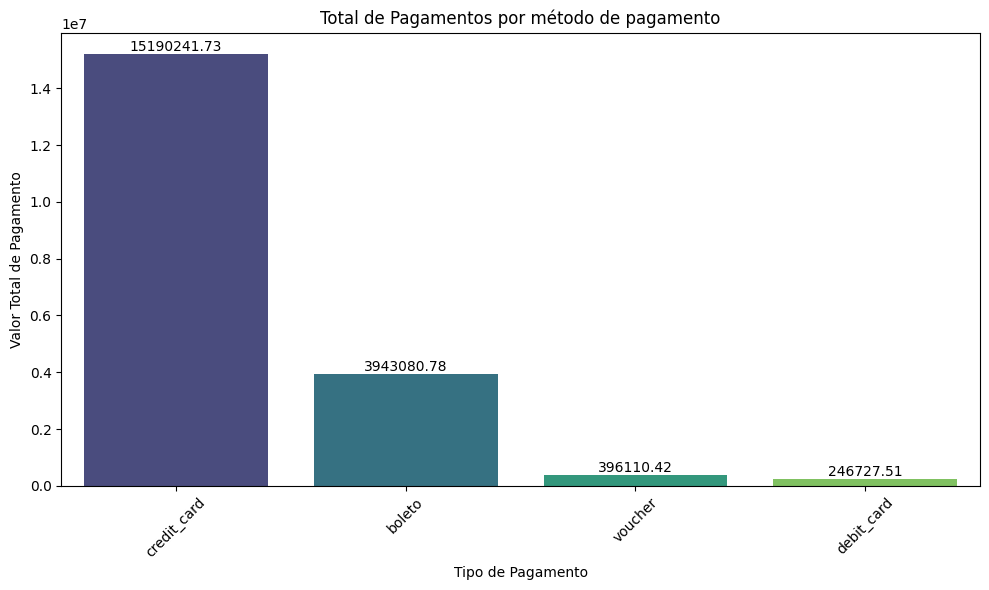

In [55]:
#criando o gráfico para visualizar o resultado da análise
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_metodo_pag, x='payment_type', y='payment_value', palette='viridis')

# Colocando o total de pagamento de cada método no gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Total de Pagamentos por método de pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Valor Total de Pagamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Na análise acima identificamos que o cartão de crédito é disparado o método de pagamento mais utilizado na plataforma, presente em 76% das vendas. Já o cartão de débito está presente em apenas 1%. Se tivermos como objetivo aumentar o número de vendas com o cartão de débito, uma maneiras possível de melhorar este número seria disponibilizando algum desconto para o cliente na horá da finalização do pagamento com o método do cartão de débito. 

2- Qual estado é o maior consumidor da plataforma e sua representação no faturamento?

In [68]:
#Agrupando e somando os pagamento por Estado do consumidor
df_estado_faturamento = df_analise.groupby('customer_state')['payment_value'].sum().reset_index()
#calculando o percentual de cada Estado
total_pagamento = df_analise['payment_value'].sum()
df_estado_faturamento['payment_percentage'] = (df_estado_faturamento['payment_value'] / total_pagamento) * 100
df_estado_faturamento.sort_values(by='payment_percentage', ascending=False)

,customer_state,payment_value,payment_percentage
25,SP,7403993.29,37.438983
18,RJ,2688933.90,13.596845
10,MG,2281229.16,11.535248
22,RS,1110976.47,5.617756
17,PR,1030822.39,5.212450
4,BA,773182.02,3.909667
23,SC,767093.97,3.878882
8,GO,493068.70,2.493248
6,DF,421374.86,2.130721
7,ES,398321.90,2.014152


C:\Users\Ana Paula\AppData\Local\Temp\ipykernel_22564\1131990196.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_estado_faturamento, x='customer_state', y='payment_value', palette='viridis')


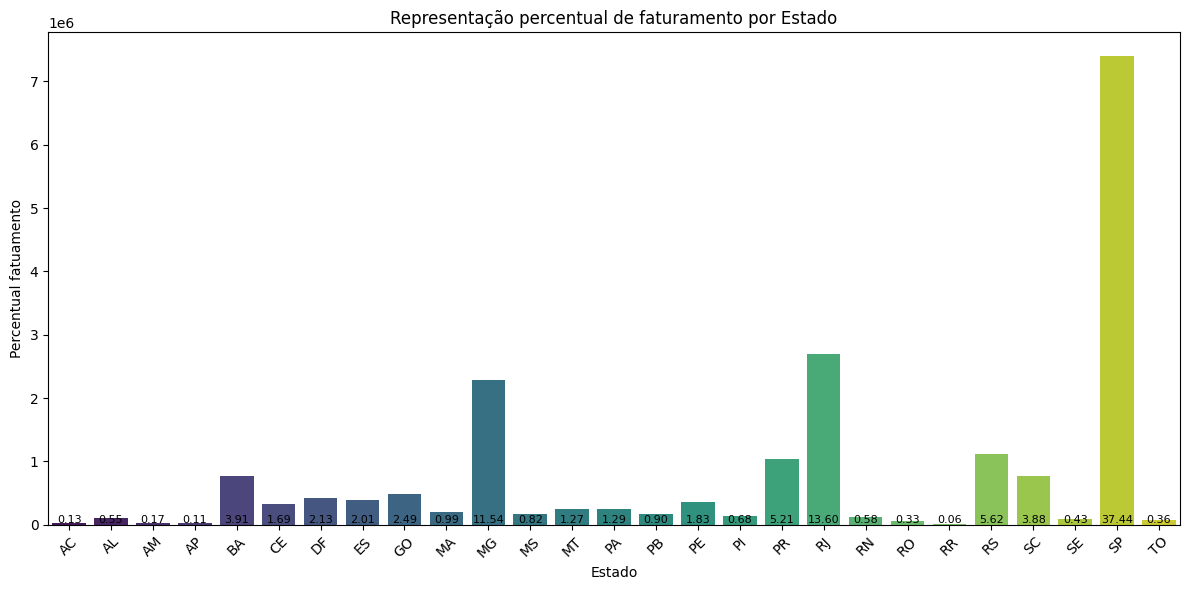

In [72]:
#criando o gráfico para visualizar o resultado da análise
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=df_estado_faturamento, x='customer_state', y='payment_value', palette='viridis')

#colocando a média de faturamento de cada Estado no gráfico
for index, row in df_estado_faturamento.iterrows():
    ax.text(index, row['payment_percentage'], f'{row["payment_percentage"]:.2f}', ha='center', va='bottom', fontsize=8)

#colocando as legendas de cada eixo
plt.title('Representação percentual de faturamento por Estado')
plt.xlabel('Estado')
plt.ylabel('Percentual fatuamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ao analisar a distribuição do valor das vendas por Estado, identificamos que SP se destaca significativamente, representando mais de 37% do faturamento total. Indicando uma forte demanda e concolidando a empresa na região. Destacamos ainda que os top3 Estados com maior representação no faturamento são da região sudeste. Por outro lado, todos os Estados da região norte estão com percentual abaixo de 2%. 

Para lidar com essa disparidade entre os estado se faz necessário uma análise mais profunda com o time de marketing para implementar estratégias mais direcionadas a região.